https://www.kaggle.com/prischu/sherlock-holmes-in-the-works

https://www.kaggle.com/nevil7/homicide-data-identifying-the-serial-killers/data

https://www.kaggle.com/mcarrie30/relationship-to-victim-vs-other-features

https://www.kaggle.com/murderaccountability/homicide-reports/discussion/54801

https://www.kaggle.com/thomasberaud/first-data-interpretation-correlation

https://www.kaggle.com/murderaccountability/homicide-reports/kernels?sortBy=hotness&group=everyone&pageSize=20&datasetId=815&datasetTabState%5BcurrentTab%5D=kernels&language=Python

https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6

https://stackabuse.com/k-means-clustering-with-scikit-learn/




Questions:

What is the race, sex and/or age range combination most likely to commit 'Murder or Manslaughter'?  
What is the race, sex and/or age range combination most likely to commit 'Manslaughter by Negligence'?  
Which states are homicide crimes highest in?  
Which weapon would males most likely use to commit homicide?  
Which weapon would females most likely use to commit homicide?  
What years were homicide crimes the highest in?  
The highest homicide crime count is between which two sexes?  
Which ethnicity is most likely a victim of homicide?  
Are we more likely to see homicide crimes between same or different ethnicities?  
Homicide crimes are highest during what months of the year?  

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


homicide = pd.read_excel("/Users/rasheshkothari/Desktop/Study/Projects/Kmeans/Datasets/Homicide_18.xlsx",
                        header=[0,1], index_col=None)
#https://github.com/pandas-dev/pandas/issues/15660
homicide.columns

MultiIndex([(          'Reporting Year',  'Unnamed: 0_level_1'),
            (                  'County',  'Unnamed: 1_level_1'),
            (             'Agency Name',  'Unnamed: 2_level_1'),
            (    'Agency Report Number',  'Unnamed: 3_level_1'),
            (             'Rec Seq Nbr',  'Unnamed: 4_level_1'),
            (             'Report Date',  'Unnamed: 5_level_1'),
            (                  'VICTIM',                 'Age'),
            (                  'VICTIM',                 'Sex'),
            (                  'VICTIM',                'Race'),
            (                'OFFENDER',                 'Age'),
            (                'OFFENDER',                 'Sex'),
            (                'OFFENDER',                'Race'),
            (             'Weapon Type', 'Unnamed: 12_level_1'),
            ('Justifiable Circumstance', 'Unnamed: 13_level_1'),
            (        'Justifiable Code', 'Unnamed: 14_level_1'),
            (          'S

In [94]:
homicide['VICTIM']['Age']

0       93
1       29
2       24
3       21
4       23
        ..
1478    22
1479    61
1480    39
1481    30
1482    45
Name: Age, Length: 1483, dtype: object

In [95]:
homicide.columns = ['_'.join(col) for col in homicide.columns.values]

In [96]:
homicide.columns

Index(['Reporting Year_Unnamed: 0_level_1', 'County_Unnamed: 1_level_1',
       'Agency Name_Unnamed: 2_level_1',
       'Agency Report Number_Unnamed: 3_level_1',
       'Rec Seq Nbr_Unnamed: 4_level_1', 'Report Date_Unnamed: 5_level_1',
       'VICTIM_Age', 'VICTIM_Sex', 'VICTIM_Race', 'OFFENDER_Age',
       'OFFENDER_Sex', 'OFFENDER_Race', 'Weapon Type_Unnamed: 12_level_1',
       'Justifiable Circumstance_Unnamed: 13_level_1',
       'Justifiable Code_Unnamed: 14_level_1',
       'Situation Code_Unnamed: 15_level_1',
       'Victim Relationship_Unnamed: 16_level_1',
       'Circumstance Code_Unnamed: 17_level_1'],
      dtype='object')

In [97]:
homicide.head()

,Reporting Year_Unnamed: 0_level_1,County_Unnamed: 1_level_1,Agency Name_Unnamed: 2_level_1,Agency Report Number_Unnamed: 3_level_1,Rec Seq Nbr_Unnamed: 4_level_1,Report Date_Unnamed: 5_level_1,VICTIM_Age,VICTIM_Sex,VICTIM_Race,OFFENDER_Age,OFFENDER_Sex,OFFENDER_Race,Weapon Type_Unnamed: 12_level_1,Justifiable Circumstance_Unnamed: 13_level_1,Justifiable Code_Unnamed: 14_level_1,Situation Code_Unnamed: 15_level_1,Victim Relationship_Unnamed: 16_level_1,Circumstance Code_Unnamed: 17_level_1
0,2018,Alachua,Alachua County Sheriff's Office,18-01134,1,2018-02-06,93,M-MALE,W-WHITE,50,M-MALE,W-WHITE,7-HANDS/FIST/FEET,1-NOT APPLICABLE,1-NOT APPLICABLE,A-SINGLE VICTIM / SINGLE OFFENDER,P-PARENT,6-OTHER NEGLIGENCE
1,2018,Alachua,Alachua County Sheriff's Office,18-01435,1,2018-02-14,29,M-MALE,B-BLACK,39,M-MALE,B-BLACK,5-KNIFE/CUTTING INSTR,1-NOT APPLICABLE,1-NOT APPLICABLE,A-SINGLE VICTIM / SINGLE OFFENDER,U-UNKNOWN,U-UNKNOWN
2,2018,Alachua,Alachua County Sheriff's Office,18-03112,1,2018-04-05,24,M-MALE,B-BLACK,UK,U-UNKNOWN,U-UNKNOWN,1-HANDGUN,1-NOT APPLICABLE,1-NOT APPLICABLE,C-SINGLE VICTIM / UNKNOWN OFFENDER(S),U-UNKNOWN,Z-OTHER
3,2018,Alachua,Alachua County Sheriff's Office,18-05526,1,2018-06-16,21,M-MALE,W-WHITE,21,M-MALE,B-BLACK,1-HANDGUN,1-NOT APPLICABLE,1-NOT APPLICABLE,A-SINGLE VICTIM / SINGLE OFFENDER,Z-OTHER,U-UNKNOWN
4,2018,Alachua,Alachua County Sheriff's Office,18-09434,1,2018-10-08,23,M-MALE,B-BLACK,22,M-MALE,B-BLACK,1-HANDGUN,1-NOT APPLICABLE,1-NOT APPLICABLE,A-SINGLE VICTIM / SINGLE OFFENDER,Z-OTHER,D-DRUG RELATED ARGUMENT


In [6]:
homicide['VICTIM_Age'].replace(to_replace='UK',value=0,inplace=True)
homicide['OFFENDER_Age'].replace(to_replace='UK',value=0,inplace=True)

homicide['VICTIM_Age'] = pd.to_numeric(homicide['VICTIM_Age'])
homicide['OFFENDER_Age'] = pd.to_numeric(homicide['OFFENDER_Age'])

In [7]:
pd.pivot_table(homicide,
               index=['County_Unnamed: 1_level_1','Agency Name_Unnamed: 2_level_1'],
               columns=['VICTIM_Sex','VICTIM_Race'],
                values='VICTIM_Age',
               fill_value=0,
               aggfunc=np.mean)

VICTIM_Sex                                                   F-FEMALE  \
VICTIM_Race                                                   B-BLACK   
County_Unnamed: 1_level_1 Agency Name_Unnamed: 2_level_1                
Alachua                   Alachua County Sheriff's Office         0.0   
                          Alachua Police Department               0.0   
                          Gainesville Police Department           0.0   
Baker                     Baker County Sheriff's Office          27.0   
Bay                       Bay County Sheriff's Office             0.0   
...                                                               ...   
Volusia                   Port Orange Police Department           0.0   
                          Volusia County Sheriff's Office        16.0   
Wakulla                   Wakulla County Sheriff's Office         0.0   
Walton                    Walton County Sheriff's Office          0.0   
Washington                Washington County Sheriff's Office      0.0   

VICTIM_Sex                                                              \
VICTIM_Race                                                  U-UNKNOWN   
County_Unnamed: 1_level_1 Agency Name_Unnamed: 2_level_1                 
Alachua                   Alachua County Sheriff's Office          0.0   
                          Alachua Police Department                0.0   
                          Gainesville Police Department            0.0   
Baker                     Baker County Sheriff's Office            0.0   
Bay                       Bay County Sheriff's Office              0.0   
...                                                                ...   
Volusia                   Port Orange Police Department            0.0   
                          Volusia County Sheriff's Office          0.0   
Wakulla                   Wakulla County Sheriff's Office          0.0   
Walton                    Walton County Sheriff's Office           0.0   
Washington                Washington County Sheriff's Office       0.0   

VICTIM_Sex                                                            M-MALE  \
VICTIM_Race                                                  W-WHITE B-BLACK   
County_Unnamed: 1_level_1 Agency Name_Unnamed: 2_level_1                       
Alachua                   Alachua County Sheriff's Office       36.0    34.5   
                          Alachua Police Department              0.0    23.0   
                          Gainesville Police Department          0.0    36.0   
Baker                     Baker County Sheriff's Office         66.0     0.0   
Bay                       Bay County Sheriff's Office            0.0    19.0   
...                                                              ...     ...   
Volusia                   Port Orange Police Department         32.0     0.0   
                          Volusia County Sheriff's Office       46.0    36.0   
Wakulla                   Wakulla County Sheriff's Office        0.0     0.0   
Walton                    Walton County Sheriff's Office         0.0     0.0   
Washington                Washington County Sheriff's Office    45.0     0.0   

VICTIM_Sex                                                                     \
VICTIM_Race                                                  O-ORIENTAL/ASIAN   
County_Unnamed: 1_level_1 Agency Name_Unnamed: 2_level_1                        
Alachua                   Alachua County Sheriff's Office                   0   
                          Alachua Police Department                         0   
                          Gainesville Police Department                     0   
Baker                     Baker County Sheriff's Office                     0   
Bay                       Bay County Sheriff's Office                       0   
...                                                                       ...   
Volusia                   Port Orange Police Department                     0   
         

mi = pd.MultiIndex.from_arrays(
    ((
              'Reporting Year'          
                  'County',
             'Agency Name',
    'Agency Report Number',
             'Rec Seq Nbr',
             'Report Date',
                  'VICTIM',
                  'VICTIM',
                  'VICTIM',
                'OFFENDER',
                'OFFENDER',
                'OFFENDER',
             'Weapon Type',
'Justifiable Circumstance',
        'Justifiable Code',
          'Situation Code',
     'Victim Relationship',
      'Circumstance Code'), 
     list(
     'Unnamed: 0_level_1',
'Unnamed: 1_level_1',
'Unnamed: 2_level_1',
'Unnamed: 3_level_1',
'Unnamed: 4_level_1',
'Unnamed: 5_level_1',
               'Age',
               'Sex',
              'Race',
               'Age',
               'Sex',
              'Race',
'Unnamed: 12_level_1',
'Unnamed: 13_level_1',
'Unnamed: 14_level_1',
'Unnamed: 15_level_1',
'Unnamed: 16_level_1',
'Unnamed: 17_level_1')))

mi.names = ['level_1', 'level_2']
    
    
    
    
    

In [8]:
cleaned_data = homicide[[
    'County_Unnamed: 1_level_1',
    'Agency Name_Unnamed: 2_level_1',
    'VICTIM_Age', 
    'VICTIM_Sex', 
    'VICTIM_Race', 
    'OFFENDER_Age',
    'OFFENDER_Sex', 
    'OFFENDER_Race', 
    'Weapon Type_Unnamed: 12_level_1',
    'Victim Relationship_Unnamed: 16_level_1'
]]

In [9]:
cleaned_data

,County_Unnamed: 1_level_1,Agency Name_Unnamed: 2_level_1,VICTIM_Age,VICTIM_Sex,VICTIM_Race,OFFENDER_Age,OFFENDER_Sex,OFFENDER_Race,Weapon Type_Unnamed: 12_level_1,Victim Relationship_Unnamed: 16_level_1
0,Alachua,Alachua County Sheriff's Office,93.0,M-MALE,W-WHITE,50.0,M-MALE,W-WHITE,7-HANDS/FIST/FEET,P-PARENT
1,Alachua,Alachua County Sheriff's Office,29.0,M-MALE,B-BLACK,39.0,M-MALE,B-BLACK,5-KNIFE/CUTTING INSTR,U-UNKNOWN
2,Alachua,Alachua County Sheriff's Office,24.0,M-MALE,B-BLACK,0.0,U-UNKNOWN,U-UNKNOWN,1-HANDGUN,U-UNKNOWN
3,Alachua,Alachua County Sheriff's Office,21.0,M-MALE,W-WHITE,21.0,M-MALE,B-BLACK,1-HANDGUN,Z-OTHER
4,Alachua,Alachua County Sheriff's Office,23.0,M-MALE,B-BLACK,22.0,M-MALE,B-BLACK,1-HANDGUN,Z-OTHER
...,...,...,...,...,...,...,...,...,...,...
1478,Wakulla,Wakulla County Sheriff's Office,22.0,M-MALE,W-WHITE,20.0,M-MALE,W-WHITE,1-HANDGUN,Z-OTHER
1479,Walton,Walton County Sheriff's Office,61.0,M-MALE,W-WHITE,55.0,F-FEMALE,W-WHITE,4-FIREARM,Z-OTHER
1480,Walton,Walton County Sheriff's Office,39.0,M-MALE,W-WHITE,30.0,M-MALE,W-WHITE,5-KNIFE/CUTTING INSTR,Z-OTHER
1481,Walton,Walton County Sheriff's Office,30.0,M-MALE,W-WHITE,49.0,M-MALE,W-WHITE,4-FIREARM,Z-OTHER


In [10]:
cleaned_data.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


What is the typical victim's age range?  

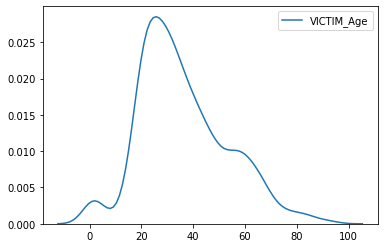

In [11]:
sns.kdeplot(cleaned_data['VICTIM_Age'])

We can see that majority of crimes are reported for the victims between 20-50

What is the relationship between the offender and victim?  

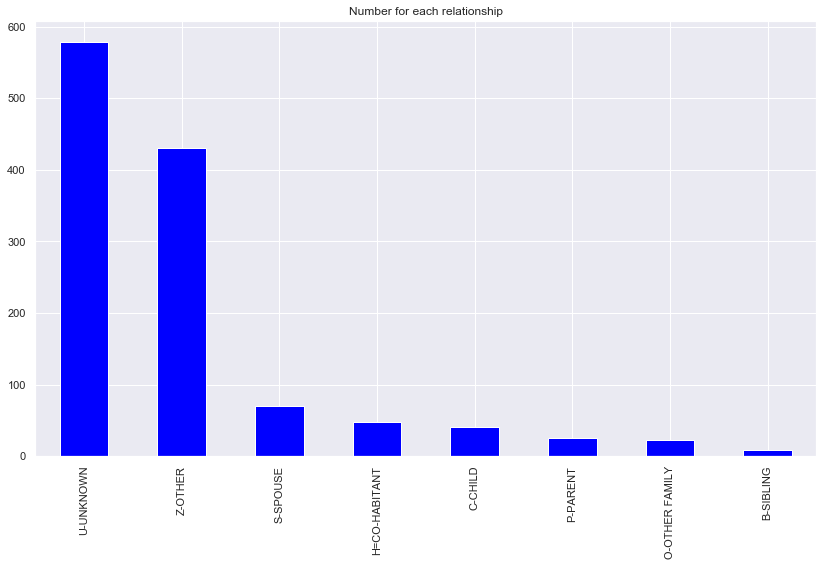

In [87]:
cleaned_data['Victim Relationship_Unnamed: 16_level_1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each relationship", color='blue')

In almost 70% of crimes, offendedrs are non-relative.

Mostly used weapon?

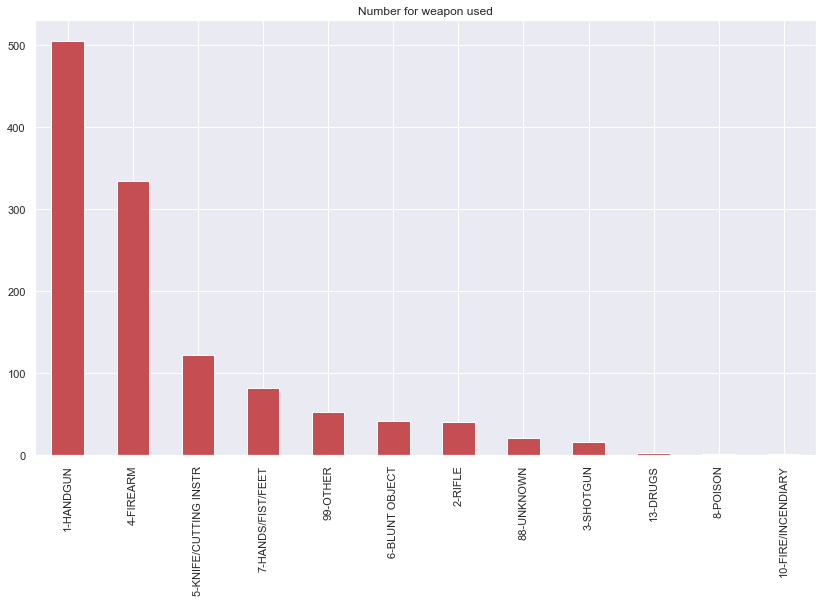

In [88]:
cleaned_data['Weapon Type_Unnamed: 12_level_1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for weapon used", color='r')

If there is relationship between the offender race and weapon used?

In [59]:
cleaned_data.groupby(['OFFENDER_Race','Weapon Type_Unnamed: 12_level_1'])["Weapon Type_Unnamed: 12_level_1"].count()

OFFENDER_Race      Weapon Type_Unnamed: 12_level_1
B-BLACK            1-HANDGUN                          190
                   13-DRUGS                             1
                   2-RIFLE                              9
                   3-SHOTGUN                            2
                   4-FIREARM                          109
                   5-KNIFE/CUTTING INSTR               48
                   6-BLUNT OBJECT                      12
                   7-HANDS/FIST/FEET                   27
                   88-UNKNOWN                           2
                   99-OTHER                            15
I-AMERICAN INDIAN  1-HANDGUN                            1
                   4-FIREARM                            1
O-ORIENTAL/ASIAN   1-HANDGUN                            2
                   6-BLUNT OBJECT                       1
U-UNKNOWN          1-HANDGUN                          157
                   2-RIFLE                             18
                   3-

[None, None]

<Figure size 1728x1152 with 0 Axes>

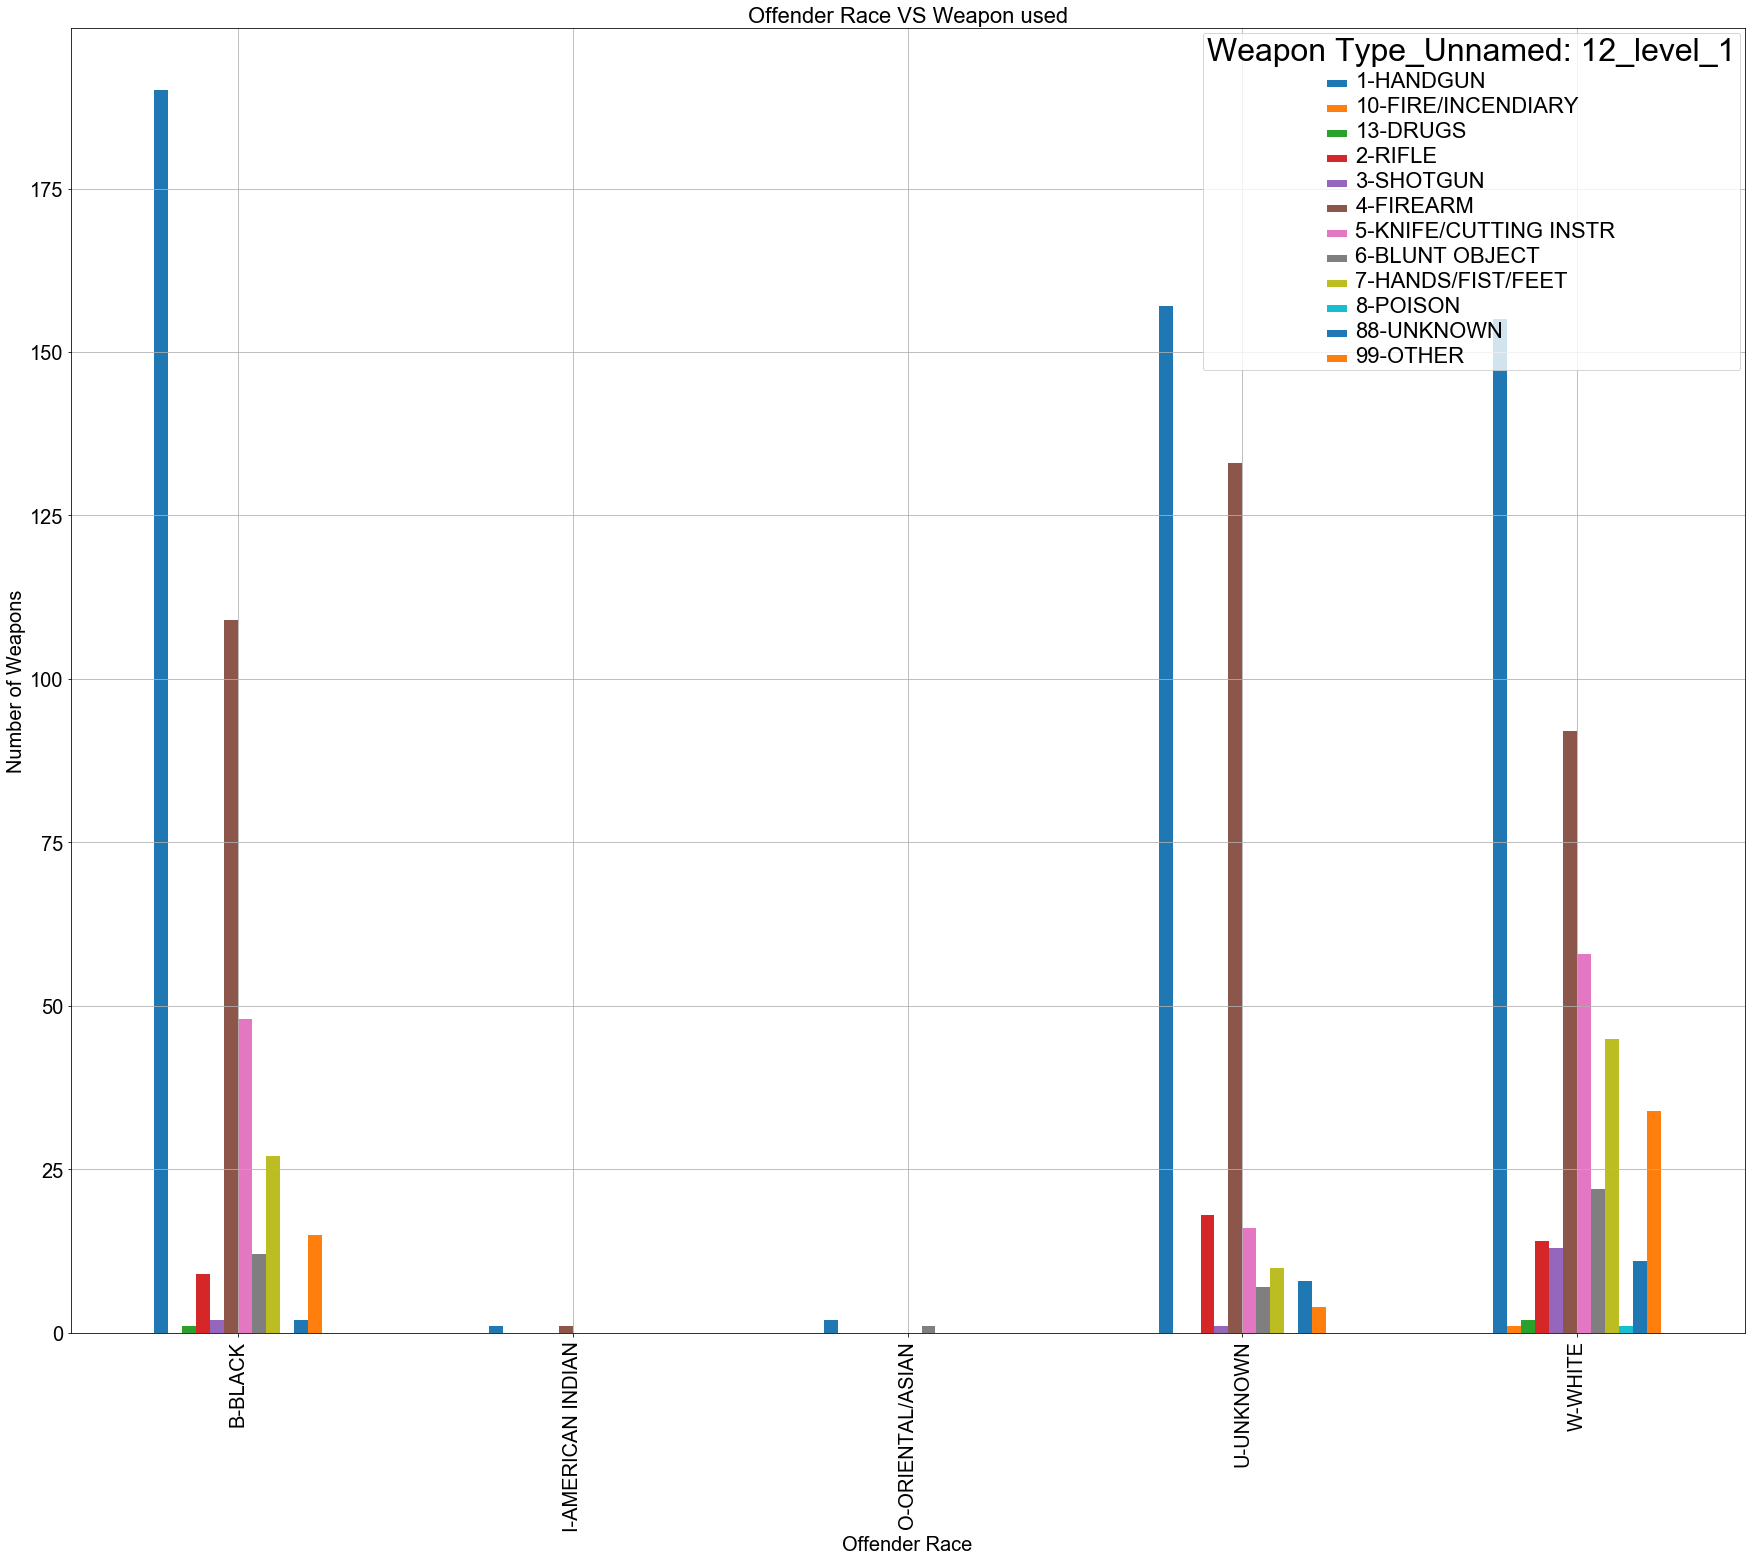

In [14]:
plt.figure(figsize=(24,16))

for_plotting = cleaned_data.groupby(['OFFENDER_Race','Weapon Type_Unnamed: 12_level_1']).size()
for_plotting = for_plotting.unstack(1).fillna(0)

ax = for_plotting.plot(kind='bar',label='avg plot',
                                            grid=True,figsize=(30,24),use_index=True,legend='True',fontsize = 20,
                                            rot='horizontal',mark_right=True,style=list,table=False)


sns.set()
plt.xticks(rotation=90)
ax.set_xlabel('X_axis',fontsize=20)
ax.set_ylabel('Y_axis',fontsize=20)
plt.xlabel('Offender Race')
plt.ylabel('Number of Weapons')
plt.title("Offender Race VS Weapon used",fontsize=22)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32')
#plt.savefig('crashes16.png')

Relationship between the use of weapon vs Offender Gender

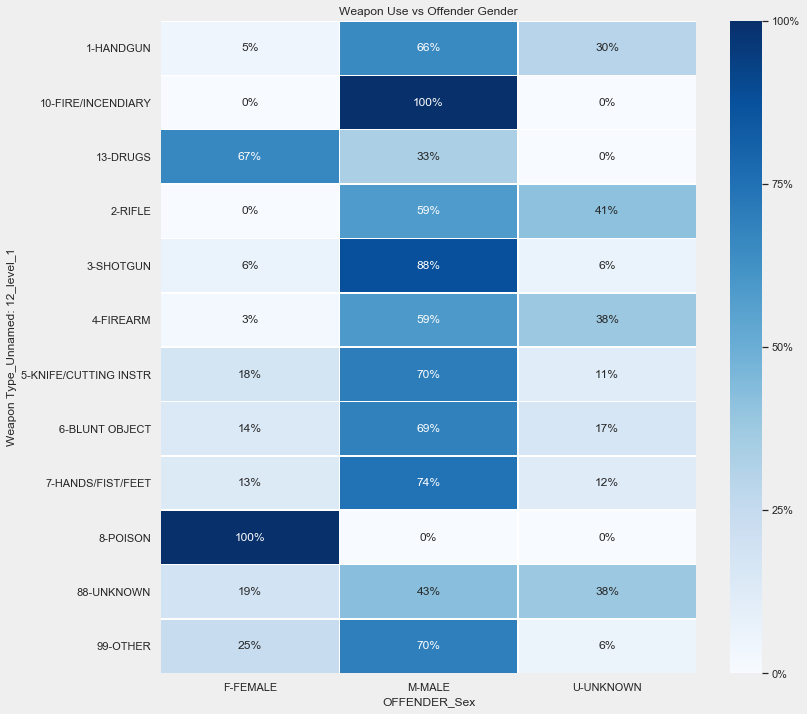

In [16]:
plt.figure(figsize=(12,12),facecolor='#efefef')
sns.set()
ax = sns.heatmap(pd.crosstab(cleaned_data['Weapon Type_Unnamed: 12_level_1'],cleaned_data['OFFENDER_Sex']).apply(lambda r: r/r.sum(), axis=1), annot=True, fmt=".0%", linewidths=.5,cmap='Blues')
ax.set_title('Weapon Use vs Offender Gender')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50, .75, 1])
cbar.set_ticklabels(['0%', '25%', '50%',  '75%', '100%'])

County wise Mean age of the Victim

In [89]:
County_Victim_Age= cleaned_data.groupby(['County_Unnamed: 1_level_1','VICTIM_Sex'])['VICTIM_Age'].mean()

In [92]:
County_Victim_Age

County_Unnamed: 1_level_1  VICTIM_Sex
Alachua                    F-FEMALE      15.000000
                           M-MALE        39.307692
Baker                      F-FEMALE      46.500000
                           M-MALE        38.000000
Bay                        F-FEMALE      55.000000
                                           ...    
Volusia                    F-FEMALE      32.857143
                           M-MALE        34.473684
Wakulla                    M-MALE        22.000000
Walton                     M-MALE        43.333333
Washington                 F-FEMALE      45.000000
Name: VICTIM_Age, Length: 101, dtype: float64

In [19]:
# Definition of a small function to construct a dictionnary
def list_par(x,l):
    if x not in l :
        l[x]=len(l)
    return l

In [20]:
# Definition of all dictionnaries to allow an acp on data
# 'County_Unnamed: 1_level_1',
#     'Agency Name_Unnamed: 2_level_1',
#     'VICTIM_Age', 
#     'VICTIM_Sex', 
#     'VICTIM_Race', 
#     'OFFENDER_Age',
#     'OFFENDER_Sex', 
#     'OFFENDER_Race', 
#     'Weapon Type_Unnamed: 12_level_1',
#     'Victim Relationship_Unnamed: 16_level_1'

#County
dic_county = {}
for county in cleaned_data['County_Unnamed: 1_level_1']:
    (list_par(county,dic_county))

#Agency
dic_agency = {} 
for agency in cleaned_data['Agency Name_Unnamed: 2_level_1']:
    (list_par(agency,dic_agency))

#Victim Sex
dic_victim_sex = {}
for vs in cleaned_data['VICTIM_Sex']:
    (list_par(vs,dic_victim_sex))

#Victim Race
dic_victim_race = {}
for vr in cleaned_data['VICTIM_Race']:
    (list_par(vr,dic_victim_race))

#OFFENDER Sex
dic_off_sex = {}
for os in cleaned_data['OFFENDER_Sex']:
    (list_par(os,dic_off_sex))
    
#OFFENDER Race
dic_off_race = {}
for ora in cleaned_data['OFFENDER_Race']:
    (list_par(ora,dic_off_race))

#Weapon Type
dic_weapon = {}
for wp in cleaned_data['Weapon Type_Unnamed: 12_level_1']:
    (list_par(wp,dic_weapon))
    
#Victim relationship
dic_victim_relation = {}
for vrel in cleaned_data['Victim Relationship_Unnamed: 16_level_1']:
    (list_par(vrel,dic_victim_relation))

In [224]:
# Data transformation with dictionnaries 

numeric_data = pd.DataFrame()
numeric_data['County_Unnamed: 1_level_1']=cleaned_data['County_Unnamed: 1_level_1'].map(dic_county)
numeric_data['Agency Name_Unnamed: 2_level_1']=cleaned_data['Agency Name_Unnamed: 2_level_1'].map(dic_agency)
numeric_data['VICTIM_Sex']=cleaned_data['VICTIM_Sex'].map(dic_victim_sex)
numeric_data['VICTIM_Age'] = cleaned_data['VICTIM_Age']
numeric_data['VICTIM_Race']=cleaned_data['VICTIM_Race'].map(dic_victim_race)
numeric_data['OFFENDER_Sex']=cleaned_data['OFFENDER_Sex'].map(dic_off_sex)
numeric_data['OFFENDER_Age'] = cleaned_data['OFFENDER_Age']
numeric_data['OFFENDER_Race']=cleaned_data['OFFENDER_Race'].map(dic_off_race)
numeric_data['Weapon Type_Unnamed: 12_level_1']=cleaned_data['Weapon Type_Unnamed: 12_level_1'].map(dic_weapon)
numeric_data['Victim Relationship_Unnamed: 16_level_1']=cleaned_data['Victim Relationship_Unnamed: 16_level_1'].map(dic_victim_relation)


In [22]:
dic_off_race

{'W-WHITE': 0,
 'B-BLACK': 1,
 'U-UNKNOWN': 2,
 'O-ORIENTAL/ASIAN': 3,
 'I-AMERICAN INDIAN': 4}

In [23]:
dic_off_sex

{'M-MALE': 0, 'U-UNKNOWN': 1, 'F-FEMALE': 2}

In [24]:
dic_victim_race

{'W-WHITE': 0, 'B-BLACK': 1, 'O-ORIENTAL/ASIAN': 2, 'U-UNKNOWN': 3}

In [25]:
dic_victim_relation

{'P-PARENT': 0,
 'U-UNKNOWN': 1,
 'Z-OTHER': 2,
 'C-CHILD': 3,
 'O-OTHER FAMILY': 4,
 'S-SPOUSE': 5,
 'B-SIBLING': 6,
 'H=CO-HABITANT': 7}

In [26]:
dic_victim_sex

{'M-MALE': 0, 'F-FEMALE': 1}

In [27]:
dic_weapon

{'7-HANDS/FIST/FEET': 0,
 '5-KNIFE/CUTTING INSTR': 1,
 '1-HANDGUN': 2,
 '4-FIREARM': 3,
 '88-UNKNOWN': 4,
 '6-BLUNT OBJECT': 5,
 '2-RIFLE': 6,
 '99-OTHER': 7,
 '3-SHOTGUN': 8,
 '13-DRUGS': 9,
 '8-POISON': 10,
 '10-FIRE/INCENDIARY': 11}

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'title'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


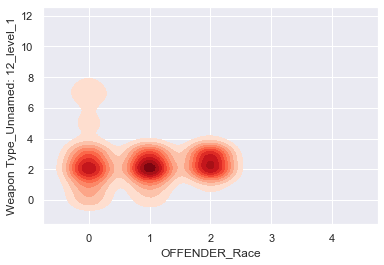

In [28]:
sns.kdeplot(numeric_data['OFFENDER_Race'], 
           numeric_data['Weapon Type_Unnamed: 12_level_1'], 
           color='r', shade=True, title='Race vs Weapon',legend=True,
            cmap="Reds", shade_lowest=False)

In [221]:
import seaborn as sns

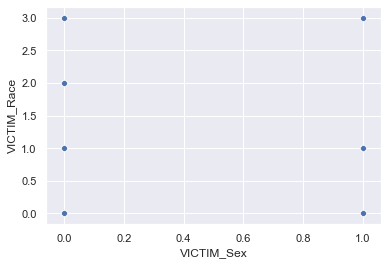

In [223]:
sns.scatterplot(subdata.VICTIM_Sex, subdata.VICTIM_Race)

Categorical data (i.e., category labels such as gender, country, browser type) needs to be encoded or separated in a way that can still work with the algorithm.  

Feature transformations, particularly to represent rates rather than measurements, can help to normalize the data. F

In [29]:
numeric_data.corr()

,County_Unnamed: 1_level_1,Agency Name_Unnamed: 2_level_1,VICTIM_Sex,VICTIM_Race,OFFENDER_Sex,OFFENDER_Race,Weapon Type_Unnamed: 12_level_1,Victim Relationship_Unnamed: 16_level_1
County_Unnamed: 1_level_1,1.000000,0.983052,0.046430,-0.048708,-0.047682,-0.052457,-0.018004,0.017083
Agency Name_Unnamed: 2_level_1,0.983052,1.000000,0.043281,-0.045646,-0.051850,-0.052925,-0.023334,0.025296
VICTIM_Sex,0.046430,0.043281,1.000000,-0.216804,-0.111900,-0.242978,-0.015418,0.361365
VICTIM_Race,-0.048708,-0.045646,-0.216804,1.000000,0.111239,0.449735,-0.075457,-0.197167
OFFENDER_Sex,-0.047682,-0.051850,-0.111900,0.111239,1.000000,0.417102,0.040510,-0.085774
OFFENDER_Race,-0.052457,-0.052925,-0.242978,0.449735,0.417102,1.000000,-0.042714,-0.352810
Weapon Type_Unnamed: 12_level_1,-0.018004,-0.023334,-0.015418,-0.075457,0.040510,-0.042714,1.000000,-0.058194
Victim Relationship_Unnamed: 16_level_1,0.017083,0.025296,0.361365,-0.197167,-0.085774,-0.352810,-0.058194,1.000000


In [225]:
subdata = numeric_data[[
    'VICTIM_Age', 
    'OFFENDER_Age' ]]

subdata.head()

,VICTIM_Age,OFFENDER_Age
0,93.0,50.0
1,29.0,39.0
2,24.0,0.0
3,21.0,21.0
4,23.0,22.0


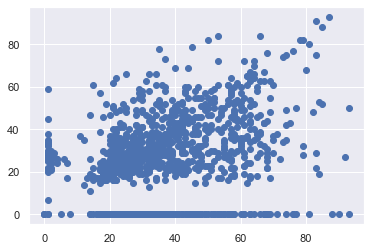

In [237]:
plt.scatter(numeric_data['VICTIM_Age'],numeric_data['OFFENDER_Age'])

Text(0.5, 1, 'Correlation between different fearures')

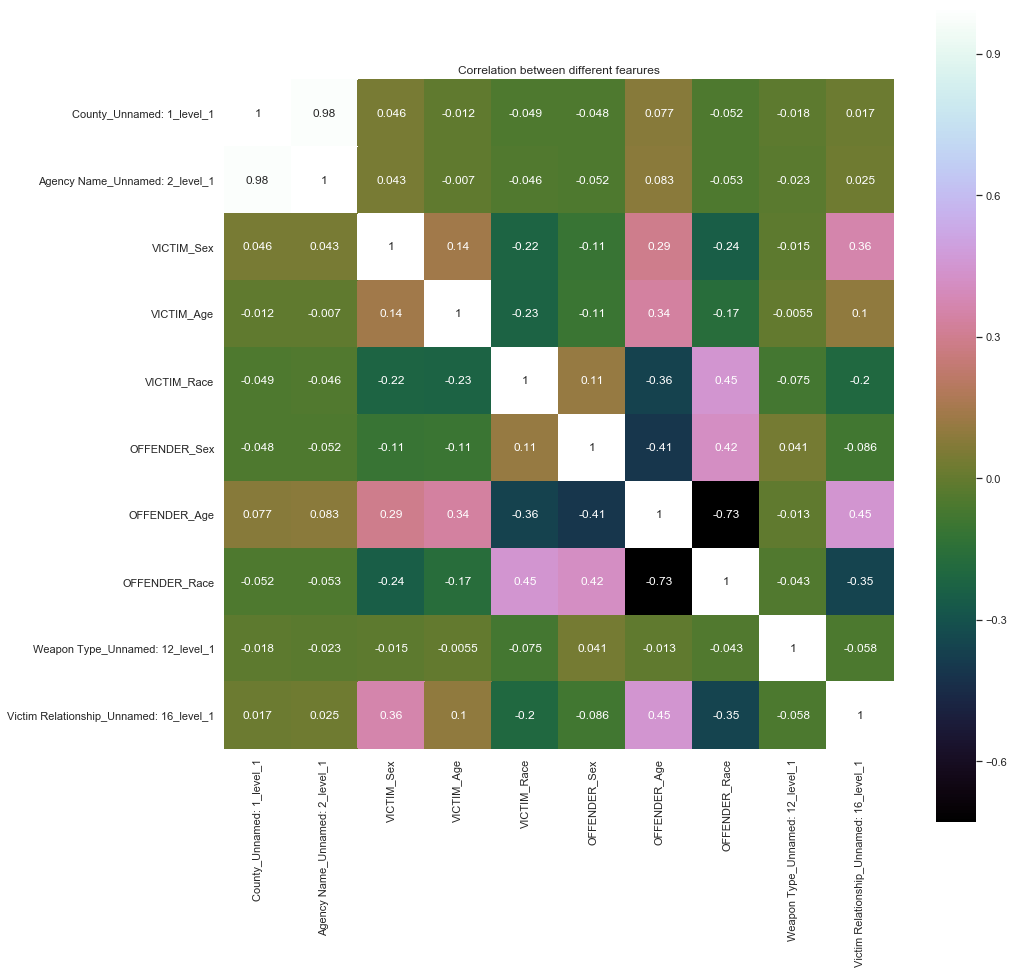

In [238]:
correlation = numeric_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
mms = MinMaxScaler()
mms.fit(numeric_data)
data_transformed = mms.transform(numeric_data)

In [226]:
mmmm = MinMaxScaler()
mmmm.fit(subdata)
sub_tra = mmmm.transform(subdata)
sub_tra

array([[1.        , 0.53763441],
       [0.31182796, 0.41935484],
       [0.25806452, 0.        ],
       ...,
       [0.41935484, 0.32258065],
       [0.32258065, 0.52688172],
       [0.48387097, 0.52688172]])

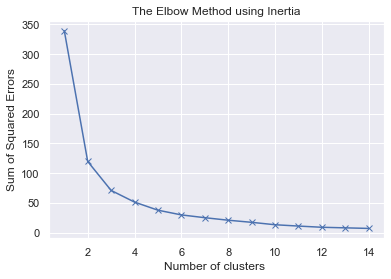

In [161]:
# Using the elbow method to find the optimal number of clusters
#data_transformed
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans=kmeans.fit(data_transformed)
    #print(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss,'bx-')
plt.title('The Elbow Method using Inertia')
plt.xlabel('Number of clusters ')
plt.ylabel('Sum of Squared Errors')
plt.show()

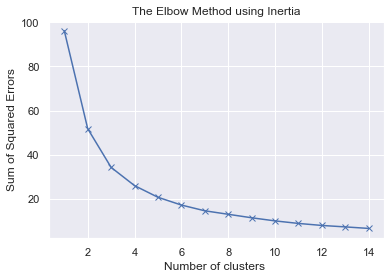

In [228]:
#Sub-tra Important 

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans=kmeans.fit(sub_tra)
    #print(x)
    
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss,'bx-')
plt.title('The Elbow Method using Inertia')
plt.xlabel('Number of clusters ')
plt.ylabel('Sum of Squared Errors')
plt.show()



#k = 5 or 6
#To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. 
#Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

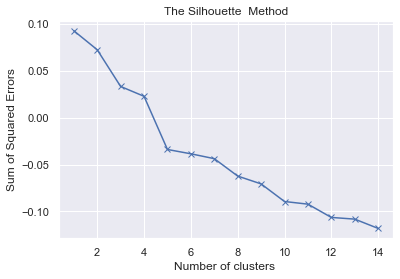

In [239]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 14

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i).fit(sub_tra)
    labels = kmeans.labels_
    sil.append(silhouette_score(data_transformed, labels, metric = 'euclidean'))

plt.plot(range(1, 15), sil,'bx-')
plt.title('The Silhouette  Method')
plt.xlabel('Number of clusters ')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
x_train ,x_test = train_test_split(sub_tra,test_size=0.3, random_state=42)   

In [242]:
x_train.shape

(855, 2)

In [243]:
len(x_train)

855

In [244]:
len(x_test)

367

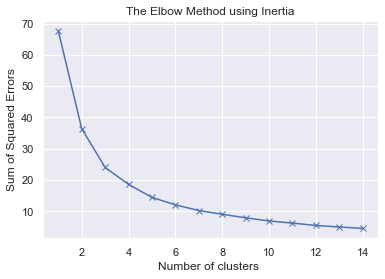

In [245]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter=5000)
    kmeans=kmeans.fit(x_train)
    #print(x)
    
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss,'bx-')
plt.title('The Elbow Method using Inertia')
plt.xlabel('Number of clusters ')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [246]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0, max_iter=500)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [247]:
y_kmeans = kmeans.fit_predict(x_test)

y_kmeans

array([0, 1, 2, 3, 3, 0, 0, 1, 0, 2, 2, 3, 3, 2, 2, 1, 1, 3, 3, 3, 1, 3,
       0, 0, 0, 0, 1, 1, 3, 3, 0, 2, 1, 3, 0, 3, 3, 2, 2, 2, 2, 3, 3, 0,
       0, 3, 3, 3, 1, 3, 1, 2, 0, 3, 2, 3, 2, 3, 1, 2, 1, 1, 1, 3, 0, 0,
       2, 0, 3, 1, 3, 0, 1, 0, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 2, 0, 3,
       3, 0, 1, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 3, 0, 1, 1, 1, 0,
       3, 3, 1, 0, 2, 1, 0, 2, 0, 3, 3, 0, 3, 3, 1, 3, 2, 0, 3, 0, 0, 1,
       3, 1, 3, 3, 1, 2, 3, 3, 0, 2, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       0, 0, 3, 2, 0, 3, 1, 1, 0, 1, 0, 3, 0, 3, 2, 3, 2, 3, 1, 1, 3, 2,
       3, 0, 2, 0, 3, 3, 2, 3, 1, 0, 1, 0, 1, 3, 1, 1, 0, 1, 0, 3, 1, 0,
       3, 0, 0, 2, 0, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0, 2, 3, 1, 1, 2, 2, 1,
       3, 0, 2, 1, 3, 1, 3, 1, 3, 2, 0, 3, 3, 3, 3, 3, 2, 0, 3, 2, 0, 0,
       0, 0, 2, 2, 3, 1, 3, 0, 3, 3, 0, 2, 2, 0, 2, 3, 1, 3, 1, 3, 3, 1,
       2, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2, 1, 3, 3, 0, 2, 0, 0, 3, 1, 2, 3,
       2, 3, 0, 2, 3, 0, 0, 0, 3, 0, 2, 3, 1, 2, 0,

In [248]:
x_test[y_kmeans == 3]

array([[0.15053763, 0.27956989],
       [0.20430108, 0.22580645],
       [0.24731183, 0.46236559],
       [0.01075269, 0.22580645],
       [0.22580645, 0.17204301],
       [0.35483871, 0.40860215],
       [0.23655914, 0.23655914],
       [0.31182796, 0.31182796],
       [0.35483871, 0.38709677],
       [0.2688172 , 0.35483871],
       [0.33333333, 0.23655914],
       [0.21505376, 0.20430108],
       [0.32258065, 0.39784946],
       [0.02150538, 0.25806452],
       [0.29032258, 0.34408602],
       [0.22580645, 0.23655914],
       [0.2688172 , 0.40860215],
       [0.31182796, 0.25806452],
       [0.25806452, 0.44086022],
       [0.38709677, 0.30107527],
       [0.38709677, 0.34408602],
       [0.25806452, 0.31182796],
       [0.2688172 , 0.30107527],
       [0.3655914 , 0.31182796],
       [0.15053763, 0.50537634],
       [0.32258065, 0.39784946],
       [0.22580645, 0.5483871 ],
       [0.31182796, 0.23655914],
       [0.32258065, 0.29032258],
       [0.2688172 , 0.25806452],
       [0.

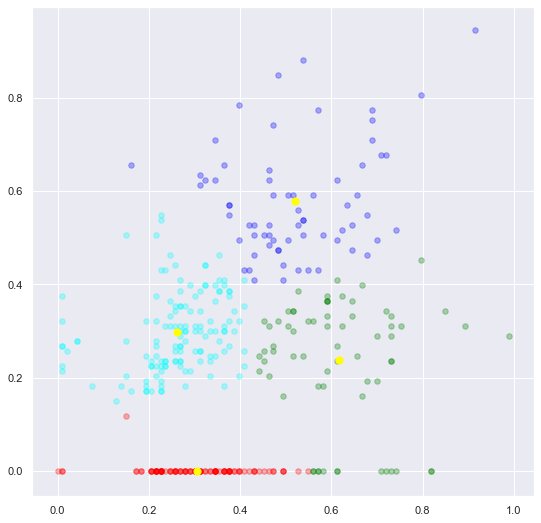

In [254]:
color = ['red', 'blue', 'green','cyan']
         #,'black','pink','magenta','crimson']
plt.figure(figsize=(9,9))
for i in range(0,4):

    plt.scatter(x_test[y_kmeans == i, 0], x_test[y_kmeans == i, 1], s = 30, c = color[i], label = i, alpha=0.3)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')



